## **Import Libaries**

In [66]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

## **Loading Dataset**

In [67]:
# Load the dataset
df = pd.read_csv("C:/Users/Rohith\Desktop/Metro_Traffic_Volume_Prediction/data/Metro_Interstate_Traffic_Volume.csv")

# Display the first few rows of the dataset
print(df.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


In [38]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


## **Data Preprocessing**

In [39]:
# Checking for missing values and duplicates
print(df.isnull().sum())  # Checking missing values

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [40]:
# Checking for duplicates
print(df.duplicated().sum()) 

17


In [41]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [42]:
# Checking data types of each column
print(df.dtypes)

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object


In [43]:
# Converting columns to appropriate data types
df['date_time'] = pd.to_datetime(df['date_time'])
df['rain_1h'] = df['rain_1h'].astype('float64')
df['snow_1h'] = df['snow_1h'].astype('float64')
df['temp'] = df['temp'].astype('float64')

# Verifying data types after conversion
print(df.dtypes)

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object


In [44]:
# Checking the shape and date range of the dataset
print(df.shape)
print(df['date_time'].min(), df['date_time'].max())

(48187, 9)
2012-10-02 09:00:00 2018-09-30 23:00:00


## **3. Exploratory Data Analysis (EDA)**

In [45]:
# Basic statistics
print(df.describe())

               temp       rain_1h       snow_1h    clouds_all  \
count  48187.000000  48187.000000  48187.000000  48187.000000   
mean     281.204995      0.334382      0.000222     49.365451   
min        0.000000      0.000000      0.000000      0.000000   
25%      272.160000      0.000000      0.000000      1.000000   
50%      282.450000      0.000000      0.000000     64.000000   
75%      291.806000      0.000000      0.000000     90.000000   
max      310.070000   9831.300000      0.510000    100.000000   
std       13.338738     44.797033      0.008169     39.015213   

                           date_time  traffic_volume  
count                          48187    48187.000000  
mean   2016-01-05 06:49:48.133729024     3259.618134  
min              2012-10-02 09:00:00        0.000000  
25%              2014-02-06 07:30:00     1192.500000  
50%              2016-06-10 21:00:00     3379.000000  
75%              2017-08-11 05:30:00     4933.000000  
max              2018-09-30 2

In [46]:

# Sorting data by date_time
df.sort_values(by=['date_time'], inplace=True)

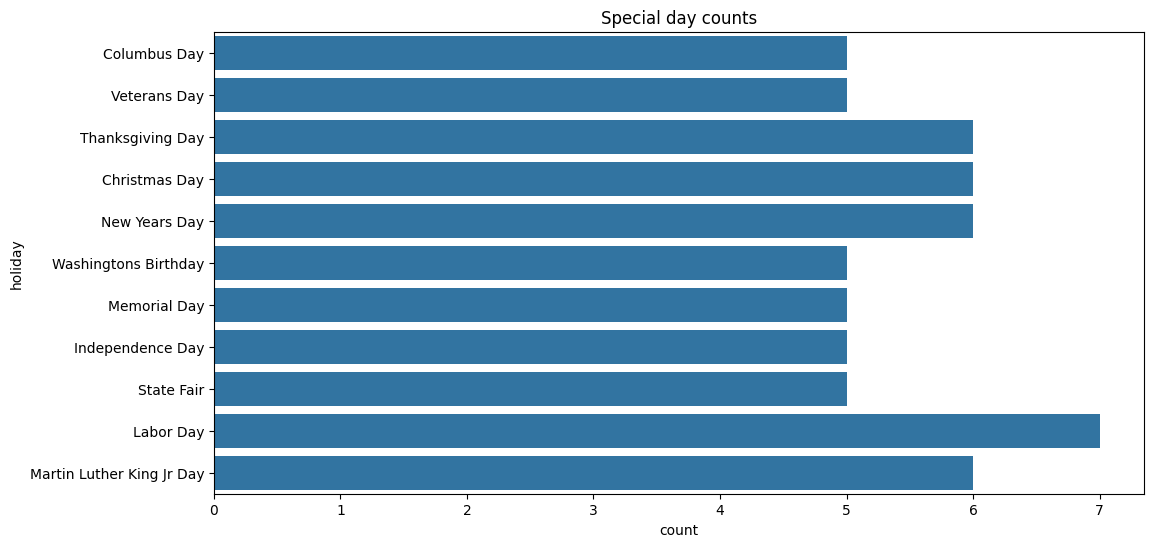

In [47]:
# Plotting the count of special days
plt.figure(figsize=(12, 6))
plt.title('Special day counts')
sns.countplot(y='holiday', data=df)
plt.show()








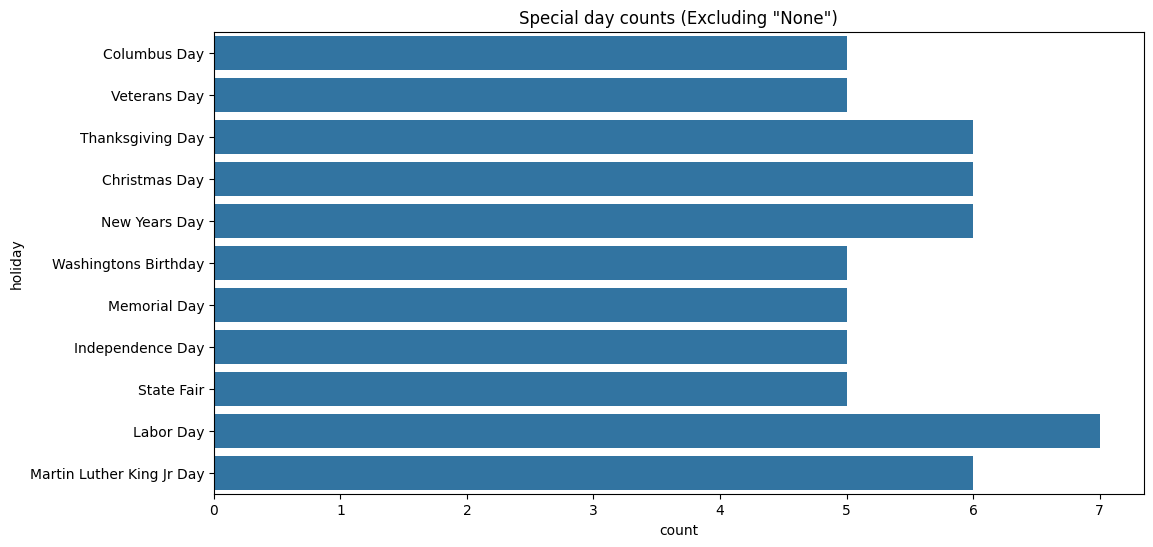

In [48]:
# Excluding 'None' holiday to see special days more clearly
plt.figure(figsize=(12, 6))
plt.title('Special day counts (Excluding "None")')
sns.countplot(y='holiday', data=df[df['holiday'] != 'None'])
plt.show()

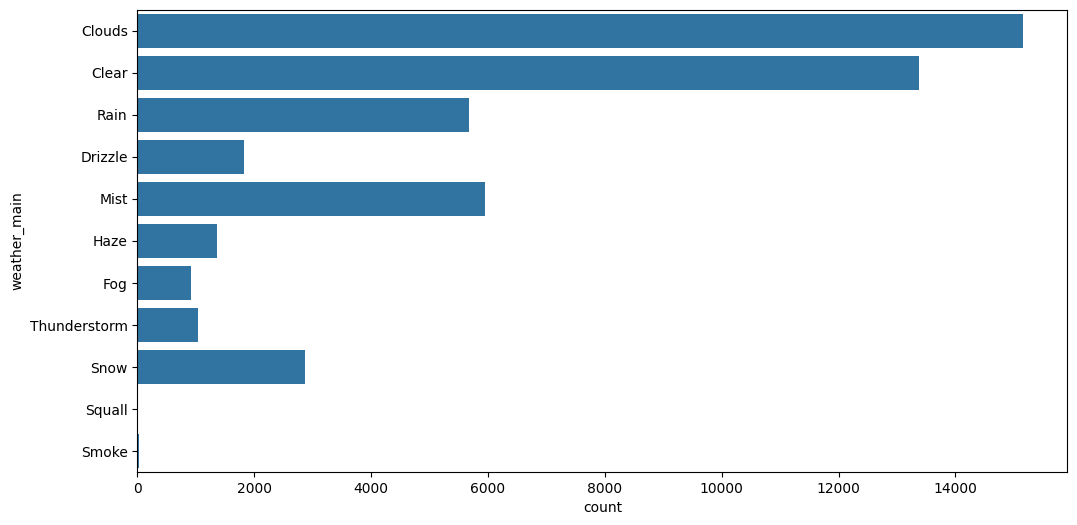

In [49]:
# Analyzing frequency of weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(y='weather_main', data=df)
plt.show()

In [50]:
# Counting weather_main categories
print(df['weather_main'].value_counts())

weather_main
Clouds          15158
Clear           13384
Mist             5949
Rain             5672
Snow             2875
Drizzle          1820
Haze             1360
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


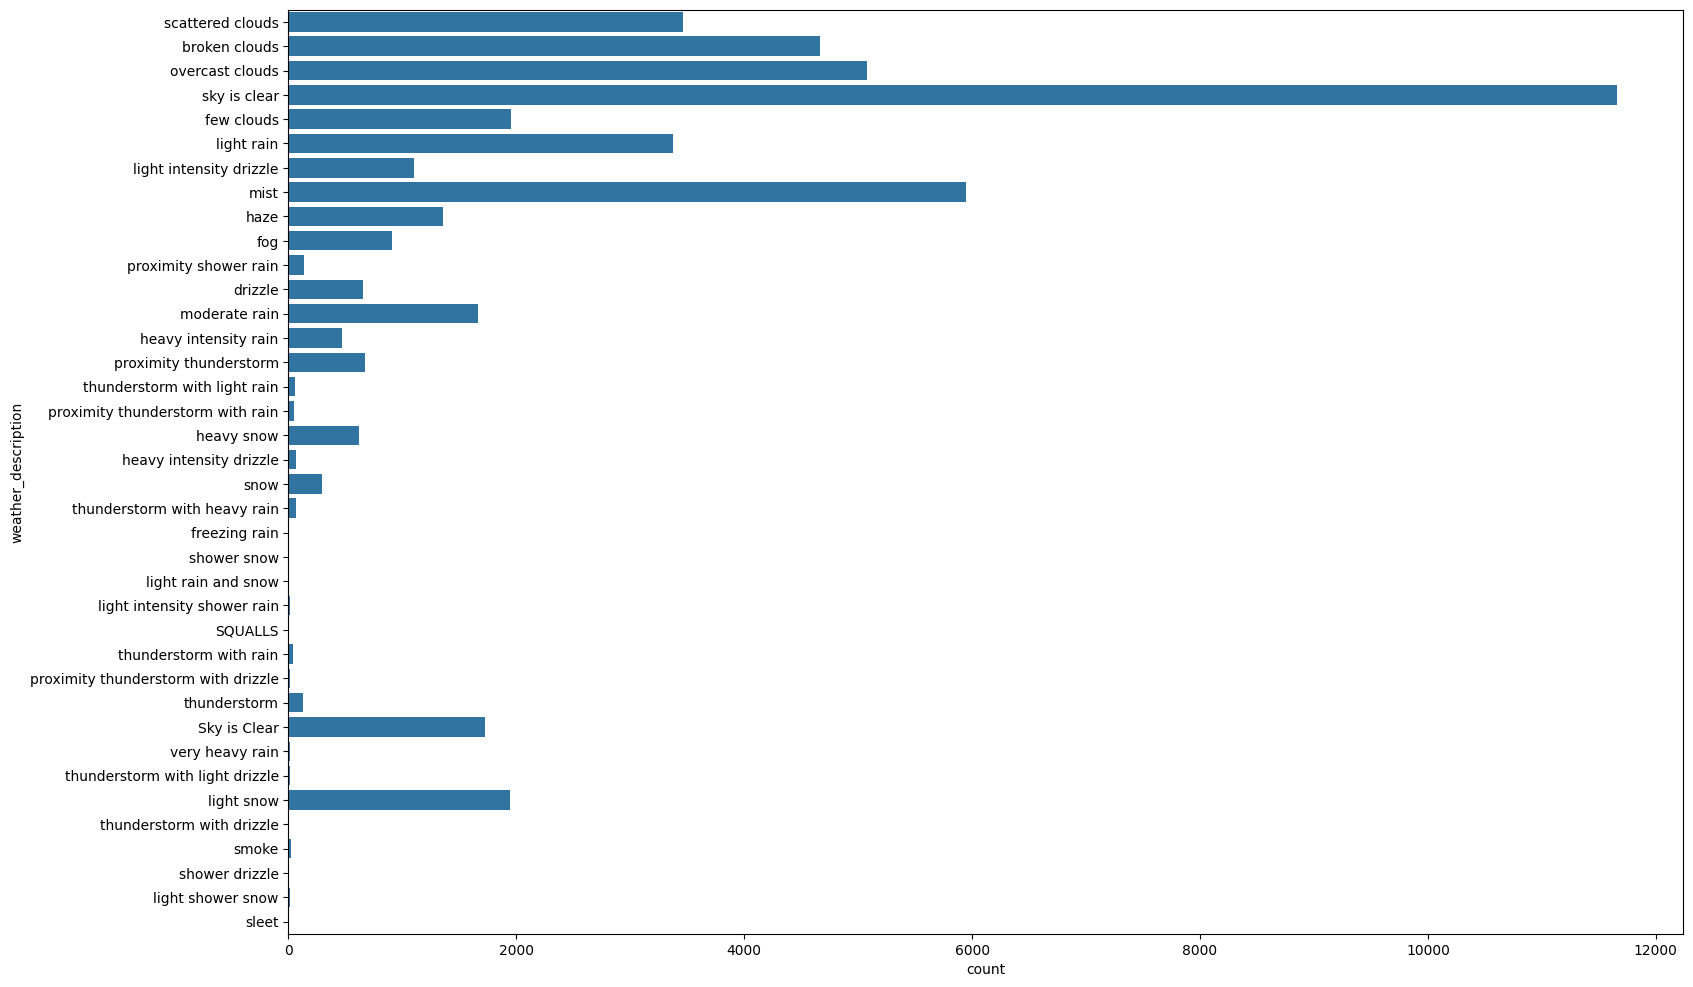

In [51]:
# Plotting the frequency of weather descriptions
plt.figure(figsize=(18, 12))
sns.countplot(y='weather_description', data=df)
plt.show()

In [52]:
# Removing 'weather_description' column as it's redundant
#df.drop(columns=['weather_description'], inplace=True)

In [53]:

# Check unique values for categorical columns
print("Unique holidays:", df['holiday'].unique())

Unique holidays: [nan 'Columbus Day' 'Veterans Day' 'Thanksgiving Day' 'Christmas Day'
 'New Years Day' 'Washingtons Birthday' 'Memorial Day' 'Independence Day'
 'State Fair' 'Labor Day' 'Martin Luther King Jr Day']


In [54]:
print("Unique weather_main:", df['weather_main'].unique())

Unique weather_main: ['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']


In [55]:
#print("Unique weather_description:", df['weather_description'].unique())

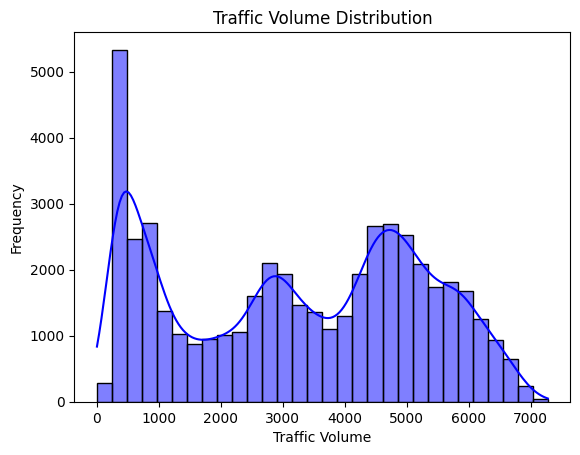

In [56]:
sns.histplot(df['traffic_volume'], bins=30, kde=True, color='blue')
plt.title('Traffic Volume Distribution')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

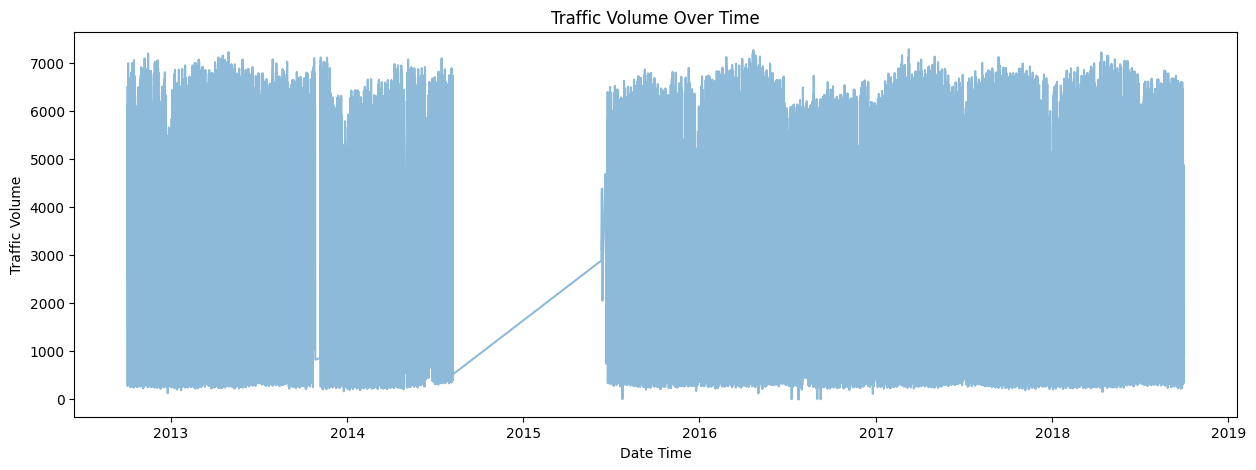

In [57]:
# Convert date_time to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

# Plot traffic volume over time
plt.figure(figsize=(15, 5))
plt.plot(df['date_time'], df['traffic_volume'], alpha=0.5)
plt.title('Traffic Volume Over Time')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.show()

In [58]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Columbus Day'

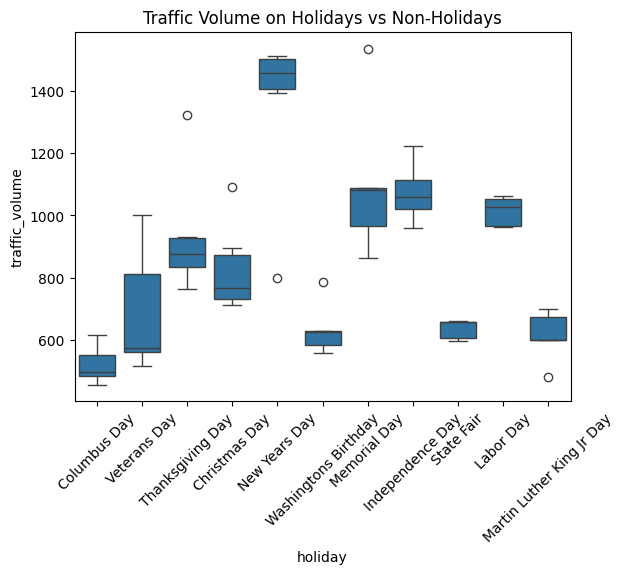

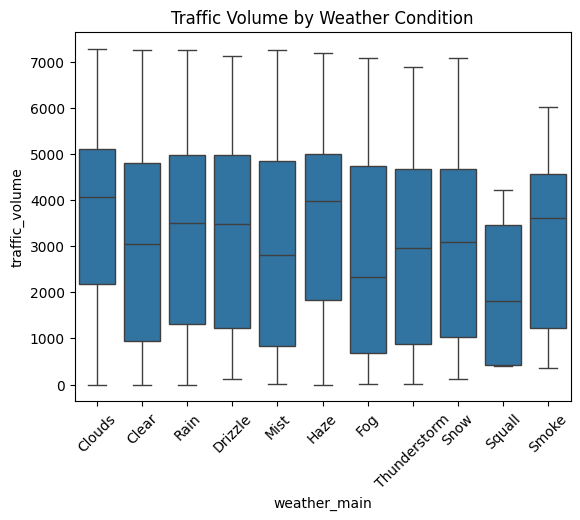

In [ ]:
# Effect of holidays on traffic volume
sns.boxplot(x='holiday', y='traffic_volume', data=df)
plt.title('Traffic Volume on Holidays vs Non-Holidays')
plt.xticks(rotation=45)
plt.show()

# Effect of weather_main on traffic volume
sns.boxplot(x='weather_main', y='traffic_volume', data=df)
plt.title('Traffic Volume by Weather Condition')
plt.xticks(rotation=45)
plt.show()


## **4. Data Preprocessing**

In [59]:
# Extract useful temporal features
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['date_time'].dt.month

# Drop original date_time column
df = df.drop(columns=['date_time'])

In [60]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['holiday', 'weather_main', 'weather_description'], drop_first=True)

In [61]:
# Initialize the scaler
scaler = StandardScaler()

# Scale continuous variables
continuous_features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
df[continuous_features] = scaler.fit_transform(df[continuous_features])

## **5. Prepare Data for Modeling**

In [62]:
# Separate features (X) and target (y)
X = df.drop(columns=['traffic_volume'])
y = df['traffic_volume']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (38549, 64)
Testing data shape: (9638, 64)


##  **6. Build and Evaluate Models**

In [63]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression - MAE: {mae_lr}, RMSE: {rmse_lr}")


Linear Regression - MAE: 1636.9484465849164, RMSE: 4323.3884725254975


In [64]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest - MAE: {mae_rf}, RMSE: {rmse_rf}")


Random Forest - MAE: 251.38783284296287, RMSE: 444.121677193901


## **7. Compare Model Performance**

In [65]:
# Compare the performance of models
performance = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf],
    "RMSE": [rmse_lr, rmse_rf]
})

print(performance)


               Model          MAE         RMSE
0  Linear Regression  1636.948447  4323.388473
1      Random Forest   251.387833   444.121677
